In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "../../input/prophet/TU_5yr.csv"
data = pd.read_csv(filename) 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,17.230000,17.305000,17.065001,17.125000,13.085770,819200
1,2015-07-10,17.174999,17.375000,17.129999,17.340000,13.250059,488400
2,2015-07-13,17.280001,17.420000,17.260000,17.355000,13.261518,271200
3,2015-07-14,17.315001,17.450001,17.155001,17.410000,13.303546,459800
4,2015-07-15,17.370001,17.385000,17.180000,17.325001,13.238596,802400


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,17.203062,17.320111,17.082343,17.205985,14.916015,7.355403e+05
std,1.338260,1.319025,1.355310,1.336949,2.051511,4.087852e+05
min,12.480000,12.620000,12.170000,12.525000,9.770628,1.341000e+05
25%,16.260000,16.375000,16.110001,16.240000,13.097214,4.653000e+05
50%,17.400000,17.514999,17.285000,17.400000,15.309363,6.639000e+05
75%,18.177499,18.262500,18.072501,18.167501,16.378943,8.863000e+05
max,20.780001,20.905001,20.715000,20.885000,20.298851,3.683400e+06


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-09,17.125000
1,2015-07-10,17.340000
2,2015-07-13,17.355000
3,2015-07-14,17.410000
4,2015-07-15,17.325001


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

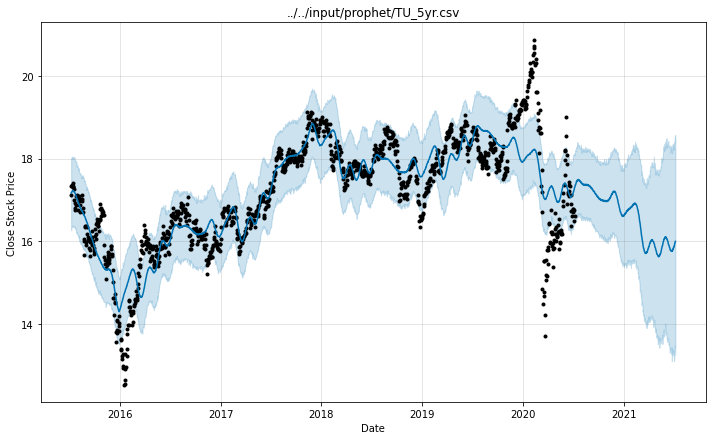

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

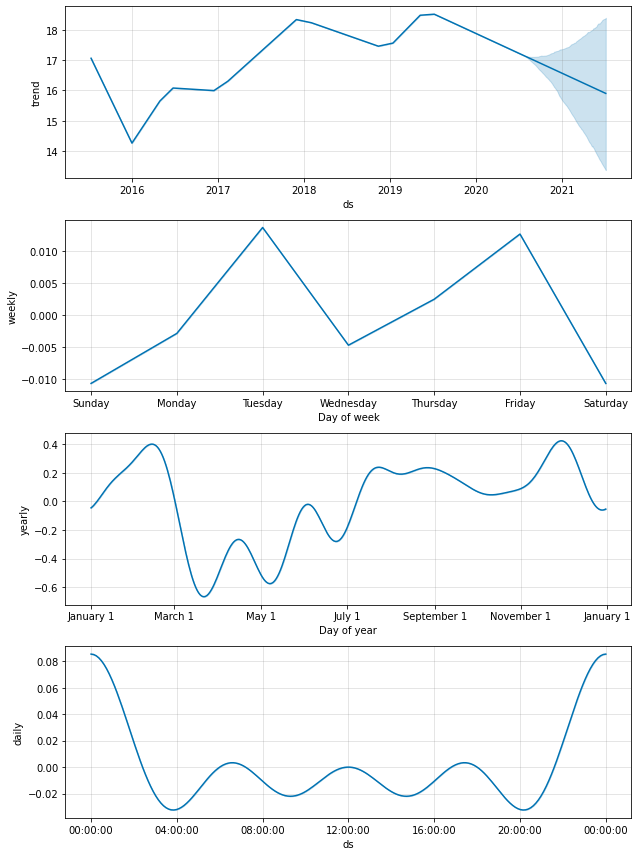

In [6]:
m.plot_components(prediction)
plt.show()